### Задача 1

1.1. Скачать данные в закрепе к уроку (данные по недвижимости)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [4]:
 df = pd.read_csv('kc_house_data.csv', encoding = 'latin-1')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2 Изучите стоимости недвижимости

In [8]:
df.price.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [9]:
### Смотрим разброс цен от min к max, и среднюю
df.price.min(), df.price.max(), df.price.mean()

(75000.0, 7700000.0, 540088.1417665294)

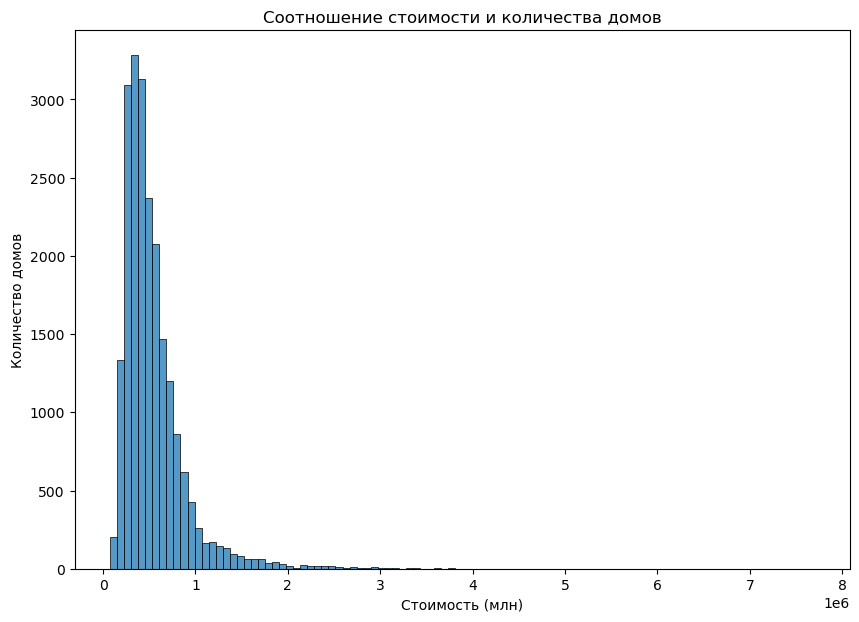

In [98]:
sns.histplot(df['price'], bins = 100)
plt.xlabel('Стоимость (млн)')
plt.ylabel('Количество домов')
plt.title('Соотношение стоимости и количества домов');

###### Как видно из гистограммы, больше всего домов в датасете стоимостью от 350000 до 550000

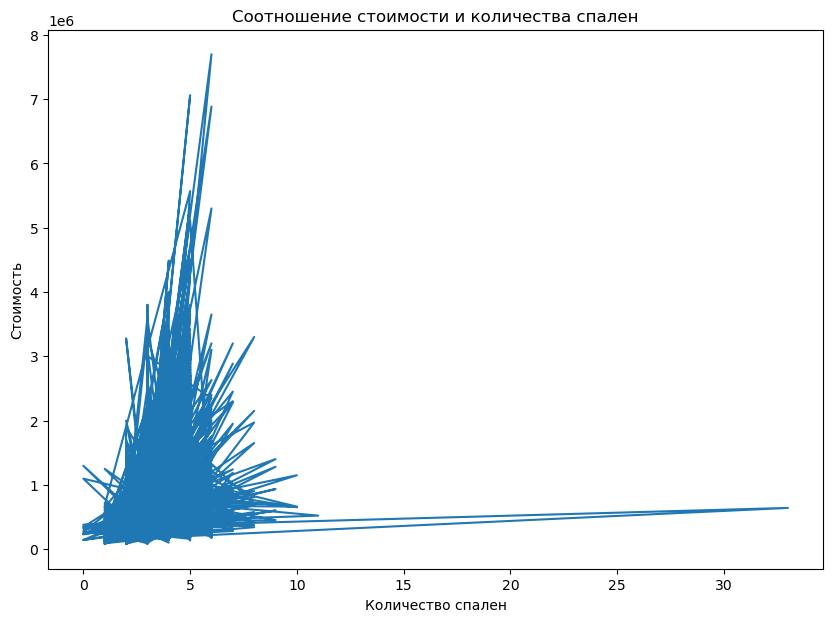

In [11]:
plt.plot(df['bedrooms'], df['price'])
plt.xlabel('Количество спален')
plt.ylabel('Стоимость')
plt.title('Соотношение стоимости и количества спален');

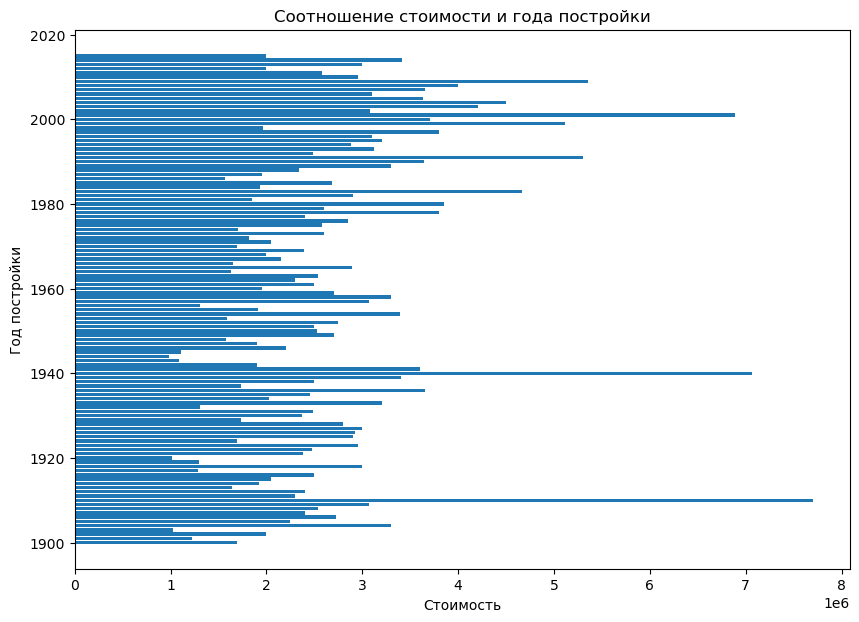

In [12]:
plt.barh(df['yr_built'], df['price'])
plt.xlabel('Стоимость')
plt.ylabel('Год постройки')
plt.title('Соотношение стоимости и года постройки');

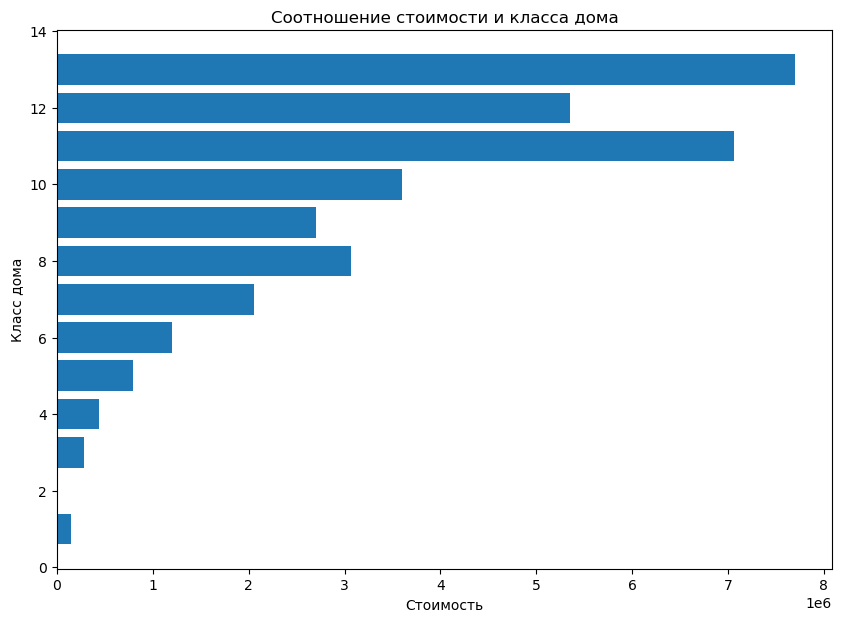

In [13]:
plt.barh(df['grade'], df['price'])
plt.xlabel('Стоимость')
plt.ylabel('Класс дома')
plt.title('Соотношение стоимости и класса дома');

In [14]:
# data = df.groupby('bedrooms')['price'].agg(sum = 'sum').reset_index()
# data.head()

#### 1.3 Изучите распределение квадратуры жилой площади

In [15]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

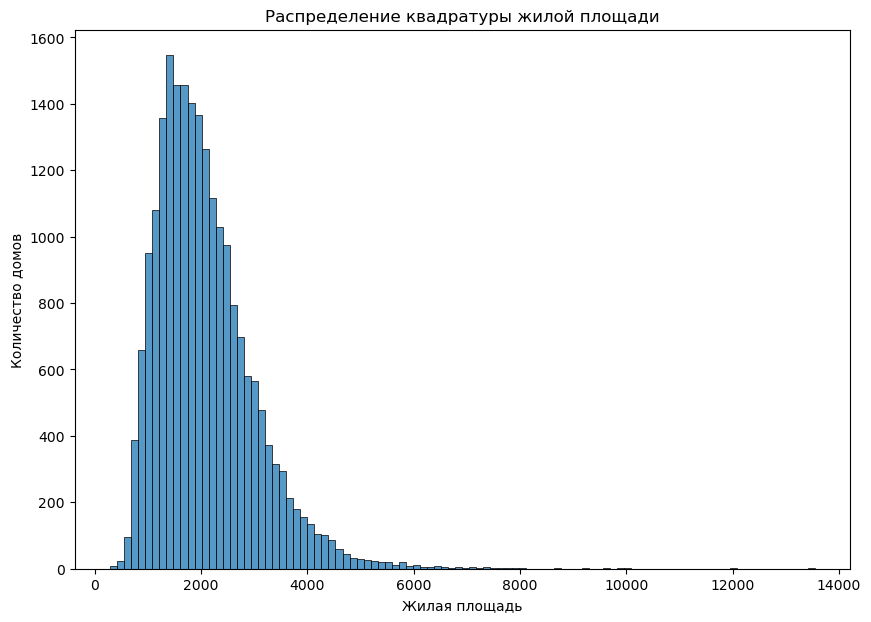

In [16]:
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов')
plt.title('Распределение квадратуры жилой площади');

##### В датасете большинство домов с жилой площадью от 800 до 2500 кв.м

#### 1.4 Изучите распределение по годам постройки

In [17]:
year_build = df.yr_built.value_counts()

In [99]:
year_build

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

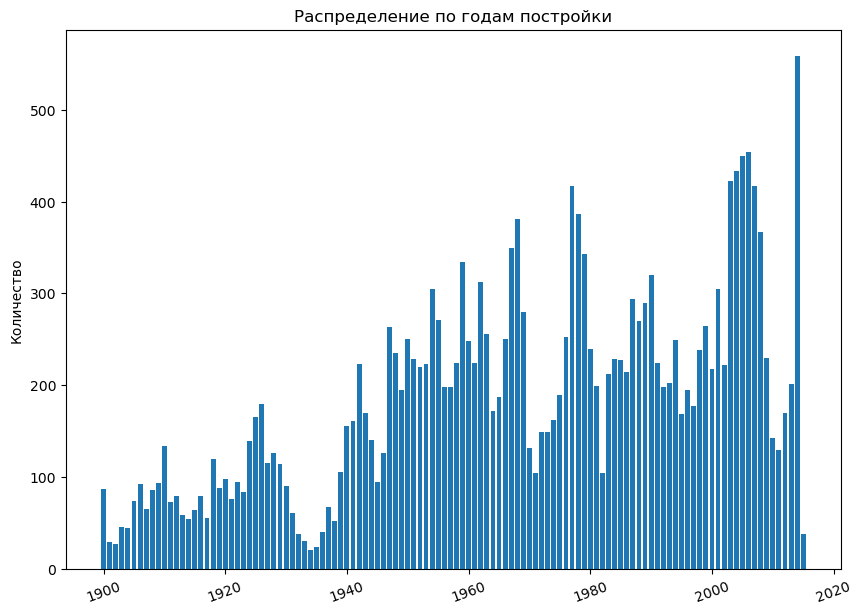

In [18]:
plt.bar(year_build.index, year_build.values)
plt.xticks(rotation = 20)
plt.ylabel('Количество')
plt.title('Распределение по годам постройки');

##### Большинство домов было построено с 2003 по 2014 годы

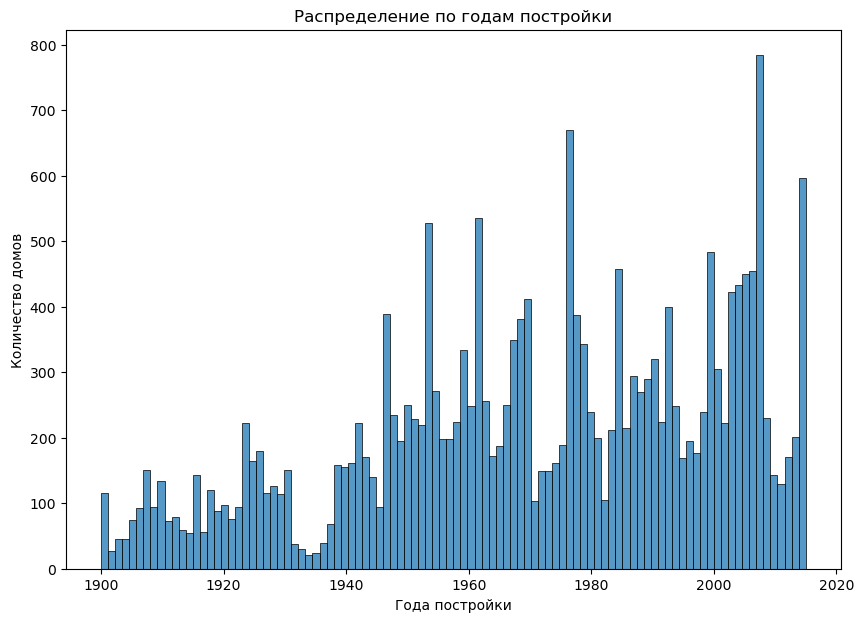

In [19]:
sns.histplot(df['yr_built'], bins = 100)
plt.xlabel('Года постройки')
plt.ylabel('Количество домов')
plt.title('Распределение по годам постройки');

### Задача 2

#### 2.1 Изучите распределение домов от наличия вида на набережную

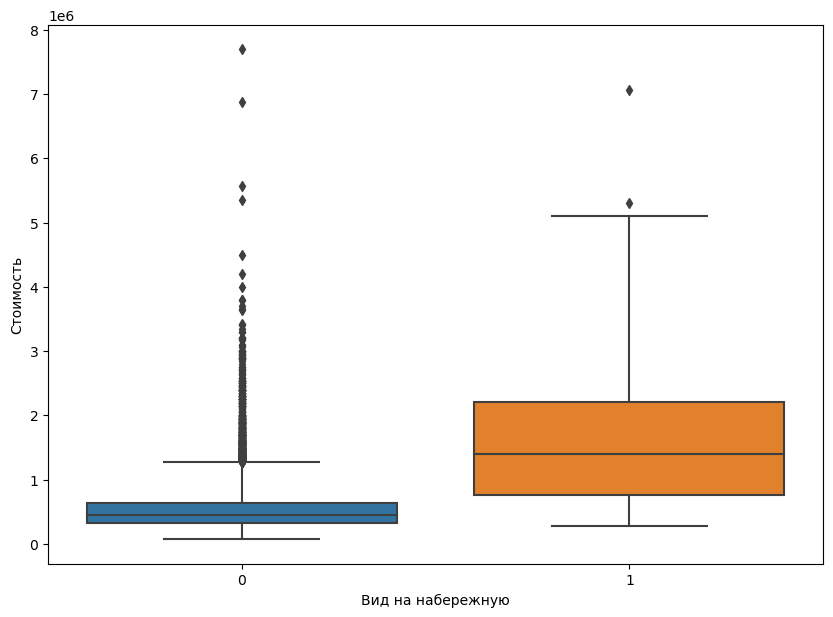

In [20]:
sns.boxplot(y = df['price'], x = df['waterfront'], whis = 2)
plt.xlabel('Вид на набережную')
plt.ylabel('Стоимость');

In [21]:
data_w = df.groupby('waterfront')['price'].agg(count = 'count').reset_index()
data_w.head()

,waterfront,count
0,0,21450
1,1,163


In [22]:
data_w.index

RangeIndex(start=0, stop=2, step=1)

In [23]:
data_w.values

array([[    0, 21450],
       [    1,   163]])

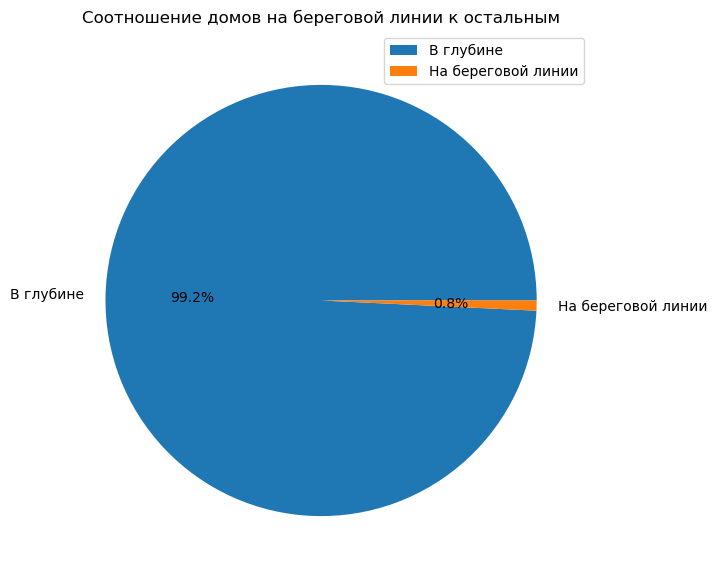

In [24]:
plt.pie(data_w['count'], autopct = '%1.1f%%', labels = ['В глубине','На береговой линии'])
plt.title('Соотношение домов на береговой линии к остальным');
plt.legend(['В глубине','На береговой линии'], loc = 'best');

##### Дома, расположенные в береговой зоне, малочисленны, но существенно выше по стоимости

In [25]:
data_v = df.groupby('view')['price'].agg(count = 'count').reset_index()
data_v.head()

,view,count
0,0,19489
1,1,332
2,2,963
3,3,510
4,4,319


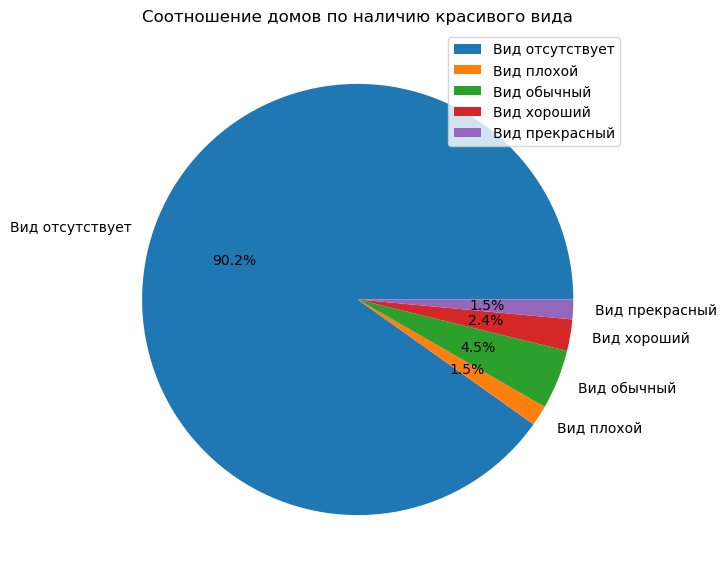

In [26]:
plt.pie(data_v['count'], autopct = '%1.1f%%', labels = ['Вид отсутствует','Вид плохой', 'Вид обычный', 'Вид хороший', 'Вид прекрасный'])
plt.title('Соотношение домов по наличию красивого вида')
plt.legend(['Вид отсутствует','Вид плохой', 'Вид обычный', 'Вид хороший', 'Вид прекрасный'], loc = 'best');

Text(0, 0.5, 'Наличие вида')

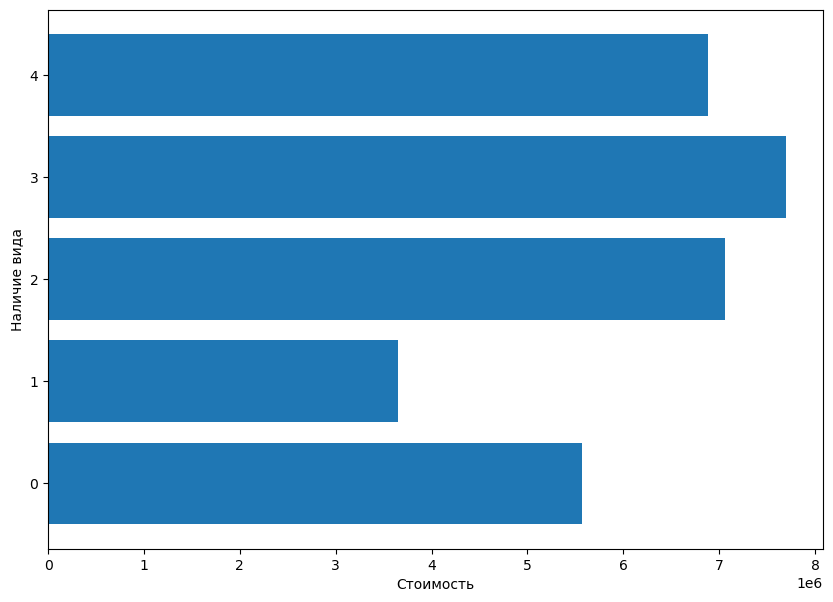

In [27]:
plt.barh(df['view'], df['price'])
plt.xlabel('Стоимость')
plt.ylabel('Наличие вида')
# plt.title('Соотношение стоимости и класса дома');

##### Дома c хорошим видом также малочисленны, но существенно выше по стоимости

#### 2.2 Изучите распределение этажей домов

In [28]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [29]:
fl = df.floors.value_counts()

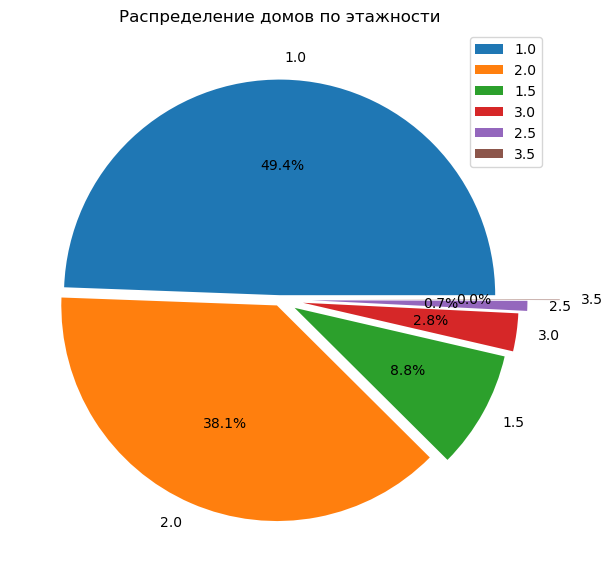

In [30]:
explode = [0.02, 0.03, 0.08, 0.11, 0.15, 0.30]
plt.pie(fl.values,  autopct = '%1.1f%%', labels = fl.index, explode = explode)
plt.title('Распределение домов по этажности');
plt.legend(fl.index, loc = 'best');

##### Почти 90% домов 1- либо 2-этажные

#### 2.2 Изучите распределение состояния домов

In [31]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

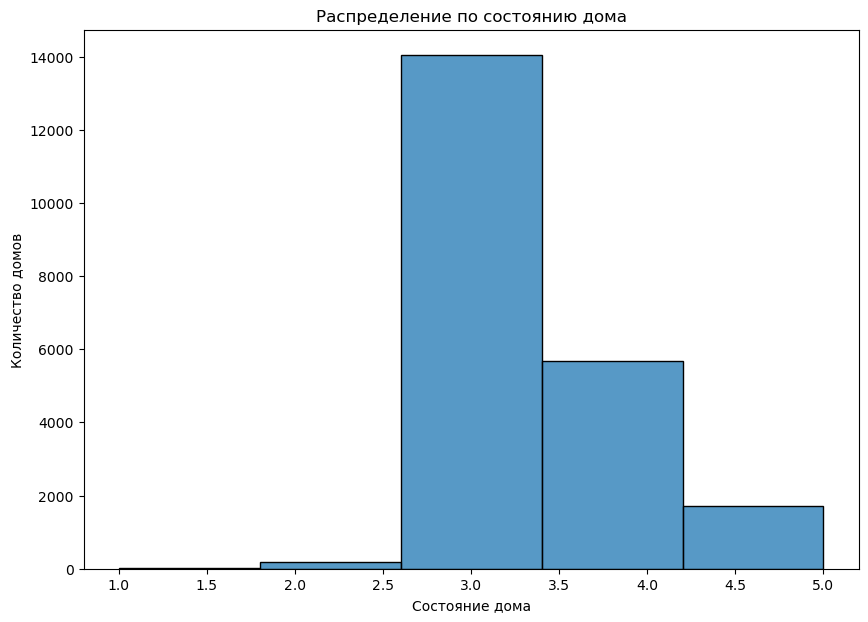

In [32]:
sns.histplot(df['condition'], bins = 5)
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов')
plt.title('Распределение по состоянию дома');

##### Большинство домов находится в удовлетворительном состоянии

### Задача 3

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [33]:
matrix = df.corr()
matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [34]:
matrix = np.round(matrix, 1)
matrix[np.abs(matrix) <=0.2] = 0
matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
upp_mat = np.triu(df.corr())

<AxesSubplot:>

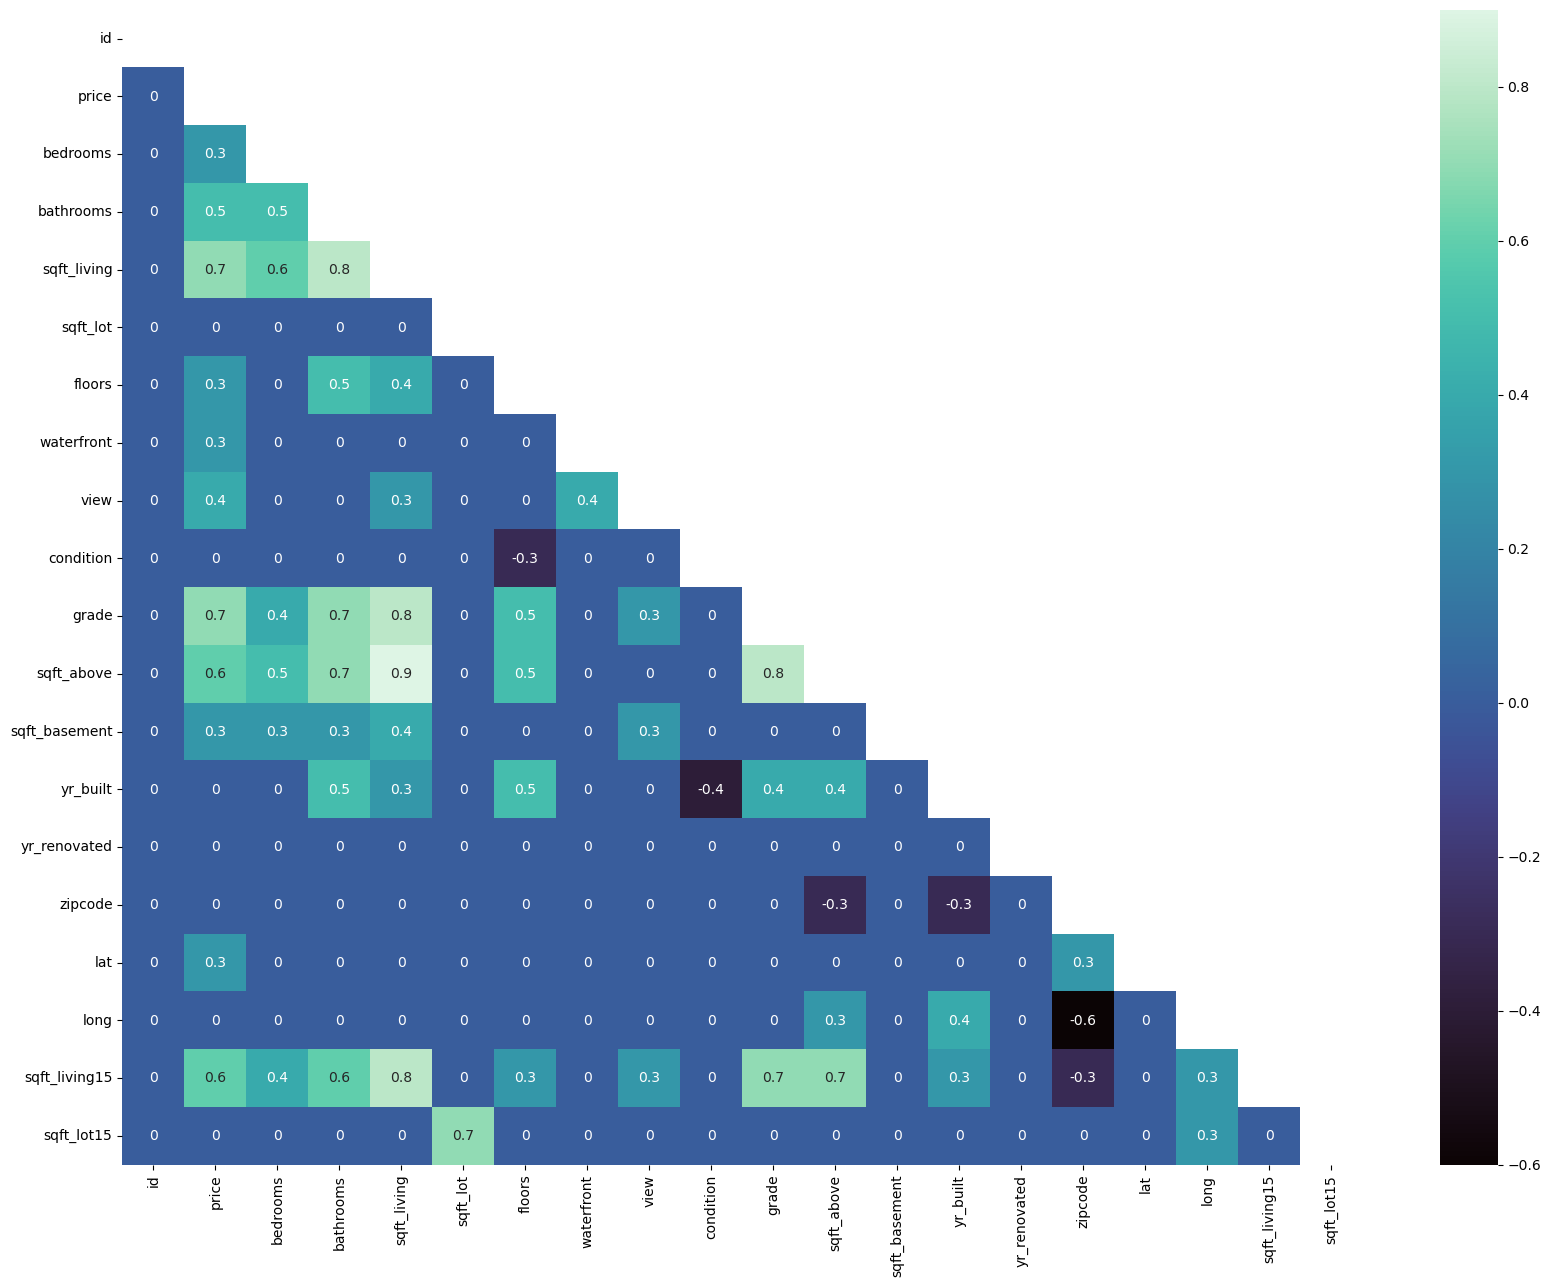

In [36]:
plt.figure(figsize = (20, 15))
sns.heatmap(matrix, annot = True, cmap = 'mako', mask = upp_mat)

##### Как следует из приведенной выше диаграммы, на стоимост дома существенно влияют следующие признаки (в порядке убывания влияния):
- общая жилая площадь
- класс дома
- площадь застройки (наличие большого двора/сада)
- увеличение площади в 2015 году (датасет видимо за 2014)
- количество ванных комнат
- вид

In [94]:
m = folium.Map(location = [df.lat.mean(), df.long.mean()], zoom_start = 10, control_scale=True)

In [95]:
m

In [100]:
part_df = df[(df['price'] > 2000000)]

In [101]:
part_df.shape

(2, 21)

In [106]:
for i,row in part_df.iterrows():
        folium.Marker(location=[row['lat'],row['long']],
                  popup = row['price']).add_to(m)

In [107]:
m

#### Распределение на карте недвижимости стоимостью более 2 млн. Большинство домов находится на береговой линии